# Parte 2: Análisis Exploratorio de Datos (EDA)

El análisis exploratorio de datos (EDA) permite comprender mejor el comportamiento y la distribución de las variables clave. El objetivo de realizarlo es: 

- Detectar sesgos o desequilibrios en las clases
- Identificar patrones útiles para el modelo
- Obtener insights que ayuden a tomar decisiones técnicas o de negocio

### Carga de datos y exploración inicial

In [2]:
import pandas as pd

# Cargar el dataset limpio
data_limpia = pd.read_csv('C:\CC219-TP-TF-2024-2--CC92\data\data_limpia.csv')

<>:4: SyntaxWarning: invalid escape sequence '\C'
<>:4: SyntaxWarning: invalid escape sequence '\C'
C:\Users\alexa\AppData\Local\Temp\ipykernel_13000\4151820050.py:4: SyntaxWarning: invalid escape sequence '\C'
  data_limpia = pd.read_csv('C:\CC219-TP-TF-2024-2--CC92\data\data_limpia.csv')


| **Columna**                    | **Descripción**                                                                                                                                                           |
| ------------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Customer Age**               | Edad del cliente. Representa la edad de la persona que realizó el ticket de soporte.                                                                                      |
| **Customer Gender**            | Género del cliente. Indica si el cliente es masculino, femenino o tiene otro género.                                                                                      |
| **Product Purchased**          | Producto comprado. Representa el producto que el cliente compró y por el cual ha creado el ticket de soporte (ejemplo: "GoPro Hero", "LG Smart TV").                      |
| **Date of Purchase**           | Fecha de compra. Indica la fecha en la que el cliente realizó la compra del producto.                                                                                     |
| **Ticket Type**                | Tipo de ticket. Define el tipo de problema o solicitud que el cliente está realizando con respecto al producto. Ejemplos incluyen "Technical issue" (Problema técnico).   |
| **Ticket Subject**             | Asunto del ticket. Resume brevemente el motivo del ticket, como "Product setup" (Configuración del producto), "Peripheral compatibility" (Compatibilidad de periféricos). |
| **Ticket Description**         | Descripción del ticket. Aquí el cliente describe el problema o consulta con más detalle. Ejemplo: "I'm having an issue with the {product\_purchase...".                   |
| **Ticket Status**              | Estado del ticket. Indica el progreso o resolución del ticket. Ejemplos incluyen "Pending Customer Response", "Closed", "Open".                                           |
| **Ticket Priority**            | Prioridad del ticket. Indica la urgencia con la que se debe resolver el problema. Los valores posibles incluyen "Critical", "Low", "Medium".                              |
| **Ticket Channel**             | Canal a través del cual se creó el ticket. Indica cómo se comunicó el cliente con el soporte. Ejemplos incluyen "Social media", "Email", "Chat", "Phone".                 |
| **Hours\_to\_First\_Response** | Tiempo hasta la primera respuesta. Representa el número de horas que tardó el equipo de soporte en dar la primera respuesta al cliente después de la creación del ticket. |


In [3]:
data_limpia.head()

,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,Hours_to_First_Response
0,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,Critical,Social media,7.0
1,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,Critical,Chat,6.0
2,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Low,Social media,7.0
3,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Low,Social media,6.0
4,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,Low,Email,20.0


In [6]:
!pip install seaborn matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl (8.1 MB)

   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2

Matplotlib is building the font cache; this may take a moment.


### Gráfico 1: Tiempo de Respuesta vs Prioridad

C:\Users\alexa\AppData\Local\Temp\ipykernel_13000\1595698008.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_limpia, x='Ticket Priority', y='Hours_to_First_Response', palette='Accent')


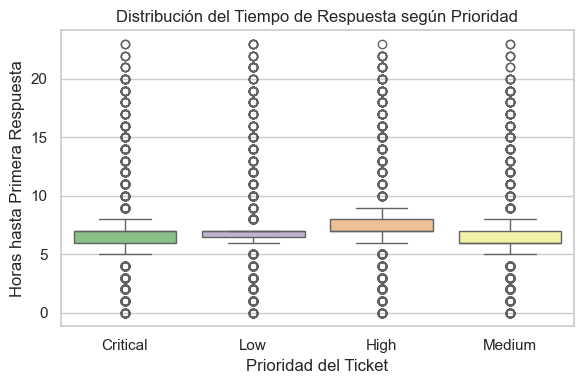

In [18]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.boxplot(data=data_limpia, x='Ticket Priority', y='Hours_to_First_Response', palette='Accent')
plt.title('Distribución del Tiempo de Respuesta según Prioridad')
plt.xlabel('Prioridad del Ticket')
plt.ylabel('Horas hasta Primera Respuesta')
plt.tight_layout()
plt.show()


El análisis de la distribución del tiempo de respuesta por nivel de prioridad revela que los tickets clasificados como "Critical" presentan una alta dispersión en el tiempo de atención, oscilando entre menos de 1 hora y más de 20 horas. Aunque la mayoría de estos casos se resuelven rápidamente (como lo indica un rango intercuartil bajo), existen valores atípicos que evidencian demoras injustificadas. Por otro lado, los niveles de prioridad "Low", "High" y "Medium" muestran tiempos de respuesta más consistentes, sin una correlación clara entre la prioridad asignada y el tiempo real de resolución. Esto sugiere que el proceso manual actual genera inconsistencias operativas, retrasando casos urgentes y afectando la eficiencia del soporte. 

Nuestra solución: Un sistema de triage automatizado basado en NLP que prioriza tickets críticos en tiempo real, garantizando que los casos más urgentes reciban atención inmediata. Esto reduce la variabilidad en tiempos de respuesta, mejora la percepción de eficiencia por parte del cliente y protege la reputación de la marca.

Insight 1: Priorización Ineficiente de Tickets Críticos
- Los tickets críticos presentan una alta dispersión en tiempos de respuesta, revelando inconsistencias en la gestión manual que retrasan casos urgentes y afectan la satisfacción del cliente.

### Gráfico 2: Promedio de Tiempo de Respuesta por Canal

C:\Users\alexa\AppData\Local\Temp\ipykernel_13000\116532948.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_limpia, x='Ticket Channel', y='Hours_to_First_Response', palette='BuPu')


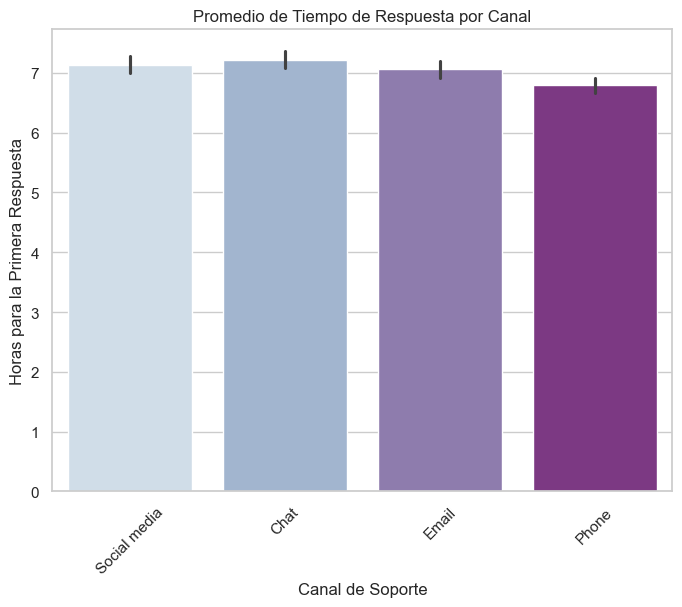

In [16]:
plt.figure(figsize=(8, 6))
sns.barplot(data=data_limpia, x='Ticket Channel', y='Hours_to_First_Response', palette='BuPu')
plt.title('Promedio de Tiempo de Respuesta por Canal')
plt.xlabel('Canal de Soporte')
plt.ylabel('Horas para la Primera Respuesta')
plt.xticks(rotation=45)
plt.show()

Al evaluar el promedio de tiempo de respuesta por canal, se identifica que el canal "Phone" lidera con un desempeño eficiente (6.8 horas de respuesta promedio), seguido por Email (7.0 horas). Sin embargo, los canales "Social media" y "Chat" presentan tiempos similares (7.2 horas) pero con mayor variabilidad, lo que sugiere una menor predictibilidad en la atención. Esta ineficiencia en canales digitales, que suelen tener alta demanda y expectativas de respuesta rápida, genera frustración en clientes jóvenes y aumenta la carga operativa sin justificar un crecimiento proporcional en la satisfacción del usuario. 

Nuestra solución: Nuestro modelo de NLP clasifica y prioriza automáticamente tickets en canales digitales, optimizando la asignación de recursos. Por ejemplo, identifica casos urgentes en redes sociales y los enruta a atención inmediata, reduciendo tiempos de espera y liberando agentes para resolver problemas complejos.

Insight 2: Desempeño Diferenciado por Canal de Soporte
- Los canales Social media y Chat muestran mayor variabilidad en tiempos de respuesta, indicando ineficiencias en canales digitales de alta demanda.

### Gráfico 3: Top 10 Temas de Ticket

C:\Users\alexa\AppData\Local\Temp\ipykernel_13000\2226115674.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_subjects.index, y=top_subjects.values, palette='crest')


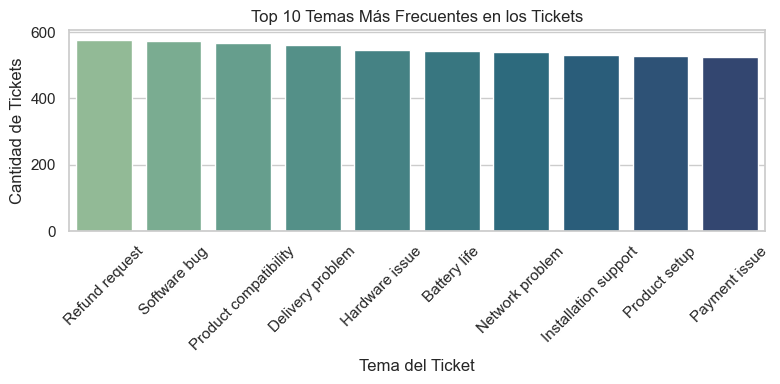

In [8]:
plt.figure(figsize=(8, 4))
top_subjects = data_limpia['Ticket Subject'].value_counts().head(10)
sns.barplot(x=top_subjects.index, y=top_subjects.values, palette='crest')
plt.title('Top 10 Temas Más Frecuentes en los Tickets')
plt.ylabel('Cantidad de Tickets')
plt.xlabel('Tema del Ticket')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El análisis del contenido de los tickets muestra que los temas más frecuentes tienen una distribución equilibrada, oscilando entre 550 y 600 tickets cada uno. La ausencia de un problema dominante refleja una diversidad amplia de áreas problemáticas, lo que dificulta enfocar esfuerzos en soluciones específicas y aumenta costos operativos. Esta falta de patrones claros limita la capacidad de abordar problemas estructurales antes de que se repitan, perpetuando un ciclo de tickets recurrentes. 

Nuestra solución: Nuestro sistema no solo prioriza tickets, sino que también categoriza automáticamente los temas recurrentes, generando informes para identificar tendencias. Esto permite a su equipo abordar problemas críticos (como bugs o fallos logísticos) antes de que se conviertan en crisis, reduciendo el volumen total de tickets y optimizando recursos.

Insight 3: Diversidad de Problemas Recurrentes en Tickets
- La ausencia de un problema dominante entre los tickets recurrentes refleja múltiples frentes de mejora.